# Import and cleaning

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


df = pd.DataFrame(pd.read_csv('hour1.csv'))

In [158]:
df['dateday'] = pd.to_datetime(df['dateday'], format='%m/%d/%Y')
day = df.insert(loc=5, column='day', value=df['dateday'].dt.day)

In [159]:
df['count'].count()

17379

In [160]:
df1 = df.copy()  # make a copy of the original dataframe

df1.loc[df1['holiday'] == 0, 'holiday'] = 'No'
df1.loc[df1['holiday'] == 1, 'holiday'] = 'Yes'

df1.loc[df1['workingday'] == 0, 'workingday'] = 'No'
df1.loc[df1['workingday'] == 1, 'workingday'] = 'Yes'

df1.loc[df1['season'] == 1, 'season'] = 'Winter'
df1.loc[df1['season'] == 2, 'season'] = 'Spring'
df1.loc[df1['season'] == 3, 'season'] = 'Summer'
df1.loc[df1['season'] == 4, 'season'] = 'Fall'

df1.loc[df1['weather'] == 1, 'weather'] = 'Clear'
df1.loc[df1['weather'] == 2, 'weather'] = 'Cloud'
df1.loc[df1['weather'] == 3, 'weather'] = 'Light'
df1.loc[df1['weather'] == 4, 'weather'] = 'Heavy'

In [161]:
display(df.head(5))
display(df1.head(5))

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-07-03,3,0,7,3,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
1,2,2011-07-03,3,0,7,3,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
2,3,2011-08-27,3,0,8,27,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
3,4,2011-02-25,1,0,2,25,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
4,5,2012-02-24,1,1,2,24,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152


,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,Light,0.80,0.7424,0.49,0.8507,181,177,358
1,2,2011-07-03,Summer,0,7,3,18,No,0,No,Light,0.80,0.7424,0.49,0.8507,74,107,181
2,3,2011-08-27,Summer,0,8,27,17,No,6,No,Light,0.64,0.5758,0.89,0.8358,2,14,16
3,4,2011-02-25,Winter,0,2,25,15,No,5,Yes,Clear,0.46,0.4545,0.41,0.8060,5,50,55
4,5,2012-02-24,Winter,1,2,24,21,No,5,Yes,Clear,0.42,0.4242,0.35,0.8060,1,151,152


In [162]:
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

# EDA

<AxesSubplot:xlabel='temp', ylabel='count'>

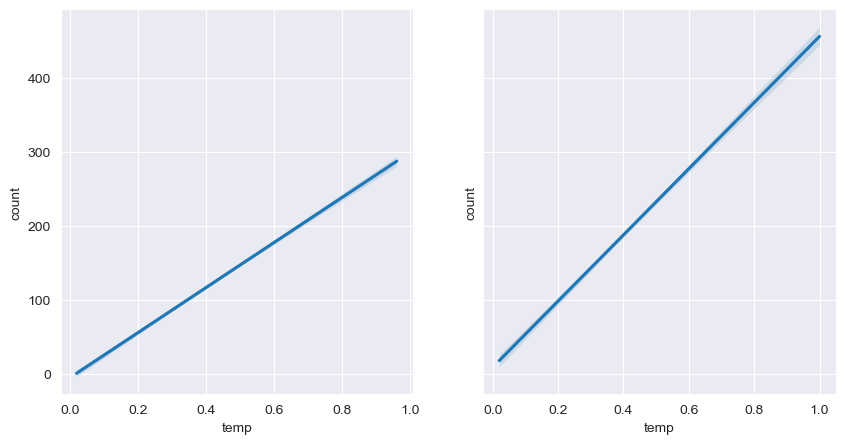

In [163]:
fig, axes = plt.subplots(ncols=2, sharey= True, figsize=(10, 5))

sns.regplot(data=df_year0, x='temp', y='count', scatter= False,  ax=axes[0])
sns.regplot(data=df_year1, x='temp', y='count', scatter= False,  ax=axes[1])


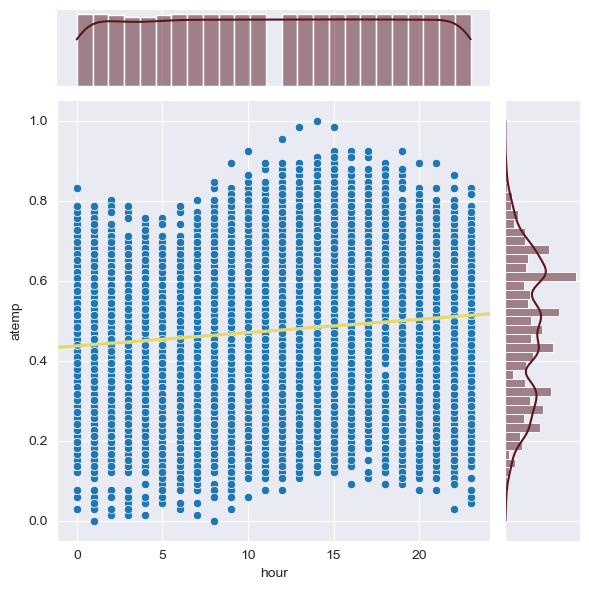

In [164]:
sns.set_style('darkgrid')

g = sns.JointGrid(data=df, x='hour', y='atemp')
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot, scatter=False, truncate=False, color= '#E4d96f')
g.plot_marginals(sns.histplot, kde=True, color= '#58181F')

plt.show()

In [165]:
# showing each step to find the average count

search_data = df[(df['season'] == 3) & (df['holiday'] == 0) & (df['workingday'] == 1)]

find_average = search_data.loc[0:,'count']

average = int(np.average(find_average))

print(f'Average count: {average}')

Average count: 238


In [166]:
# all this can 
df[(df['season'] == 3) & # summer
    (df['holiday'] == 0) & # Not holiday
    (df['hour'] >= 7) &  # Starting from
    (df['hour'] <= 19) & # Ending at
    (df['workingday'] == 1)]['count'].max() # Only working days


977

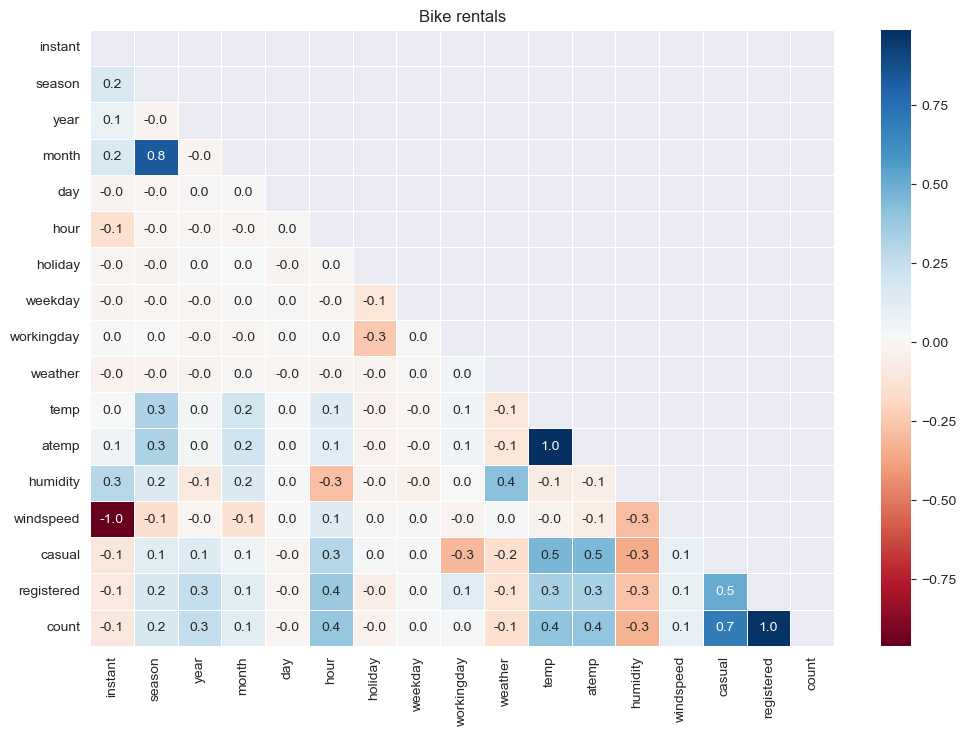

In [167]:
plt.figure(figsize=(12,8))


#giving the data 
corr = df.corr()


#giving new list 
x = df.columns.drop(['instant', 'count'])
y = df.columns.drop(['instant', 'count'])

#creating the mask to remove the top triangle
mask = np.triu(corr)

#creating the chart
sns.heatmap(corr, 
            annot=True, 
            cmap="RdBu", 
            fmt= '.1f',
            #xticklabels= x, yticklabels= y,
            mask=mask,
            linewidths= 0.5,
            #linecolor= 'black'
            )
plt.title('Bike rentals')

plt.show()

# Building ML models

In [191]:
df_rush = df[df['hour'].isin([8, 17, 18])]

In [190]:
df_notrush = df[~((df['hour'] == 8) | (df['hour'] == 17) | (df['hour'] == 18))]

## Model for Casual

In [229]:
#X = df.drop(columns=['instant', 'dateday', 'count', 'year', 'holiday', 'workingday'])
X = df[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df['casual']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

In [230]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
# count = atemp * 426.5 - 14.9

Coefficients: [112.52986275   1.62662514  -0.23824081 -33.82937204  -6.69338286
  28.62329186]
Intercept: -11.364142981740855


In [231]:
from sklearn.metrics import r2_score

# calculate R2 score
r2_score = model.score(X_test, y_test)

print('R2 score:', r2_score)

R2 score: 0.38324806536858147


In [232]:
#Example on R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.3881363229924243 0.3878721331491567


## Registarted
### Rush hours

In [251]:
df_rush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed', 'registered']]

,temp,hour,season,workingday,weather,windspeed,registered
0,0.80,17,3,0,3,0.8507,177
1,0.80,18,3,0,3,0.8507,107
2,0.64,17,3,0,3,0.8358,14
7,0.32,17,1,1,1,0.7463,181
20,0.22,18,1,0,2,0.6567,105
...,...,...,...,...,...,...,...
17340,0.38,8,4,1,1,0.0000,652
17347,0.30,8,4,1,2,0.0000,585
17361,0.22,8,1,1,1,0.0000,62
17365,0.24,8,1,0,2,0.0000,10


In [250]:
#X = df.drop(columns=['instant', 'dateday', 'count', 'year', 'holiday', 'workingday'])
X = df_rush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df_rush['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [331.70544291   0.8368885   36.55380069 285.5713826  -58.45330888
  -8.20367582]
Intercept: -22.92833964734166


In [235]:
# calculate R2 score
r2_score = model.score(X_test, y_test)
print('R2 score:', r2_score)

#Example on R_Square and Adjusted R Square
X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print(f'R2: {result.rsquared, result.rsquared_adj}')

R2 score: 0.6040055097813744
R2: (0.5960510169132018, 0.5946588894585662)


In [254]:
# New wine sample test:
new_day = [0.30,	8,	4,	1,	2,	0.0000]

# Use the trained model to predict the number of casual users 
rush_type = model.predict([new_day])

print(f"Predicted Casual users: {rush_type}")

Predicted Casual users: [398.15836882]


c:\Users\renev\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Not Rush

In [238]:
X = df_notrush[['temp', 'hour', 'season', 'workingday', 'weather', 'windspeed']]
y = df_notrush['registered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=19)

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [165.12234044   6.07760203  10.81475637   5.61166065 -17.8605387
  60.8995483 ]
Intercept: -42.84165860450754


In [239]:
# calculate R2 score
r2_score = model.score(X_test, y_test)
print('R2 score:', r2_score)

#Example on R_Square and Adjusted R Square
X_addC = sm.add_constant(X_train)
result = sm.OLS(y_train, X_addC).fit()
print(f'R2: {result.rsquared, result.rsquared_adj}')

R2 score: 0.3089790210573743
R2: (0.31597060933796384, 0.3156327614334551)


In [249]:
# New wine sample test:
new_day = [0.80, 10, 3, 0, 3, 0.8507]

# Use the trained model to predict the number of casual users 
rush_type = model.predict([new_day])
rush_type = model.predict([new_day])

print(f"Predicted Casual users: {int(rush_type)}")

Predicted Casual users: 180


c:\Users\renev\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
